In [ ]:
import keras
from keras.datasets import mnist
from keras import layers
import numpy as np
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

print("18_Ketki Patil")

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
noise_factor = 0.5

X_train_noisy = X_train+noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test+noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)


18_Ketki Patil
11490434/11490434 [==============================] - 0s 0us/step


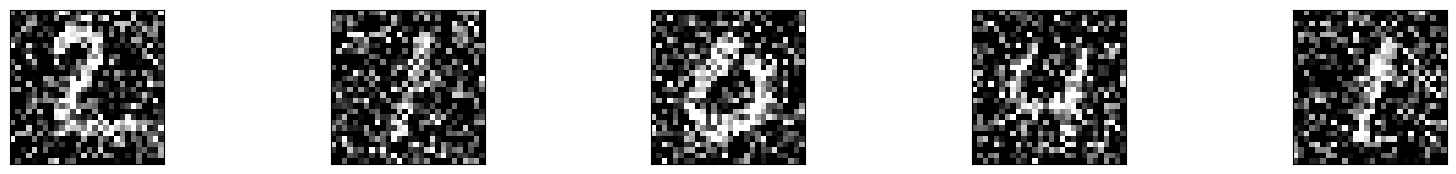

In [ ]:
# use matplotlib (don't ask) how many digits we will display
n = 5
plt.figure(figsize=(20, 2))
for i in range(1, n+1):

# display reconstrution
    ax = plt.subplot(1, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
# create the decoder model
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train_noisy, X_train,
                epochs=1,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test_noisy, X_test),
                callbacks=[TensorBoard(log_dir='/tmo/tb', histogram_freq=0, write_graph=False)])
predictions = autoencoder.predict(X_test_noisy)

313/313 [==============================] - 4s 13ms/step


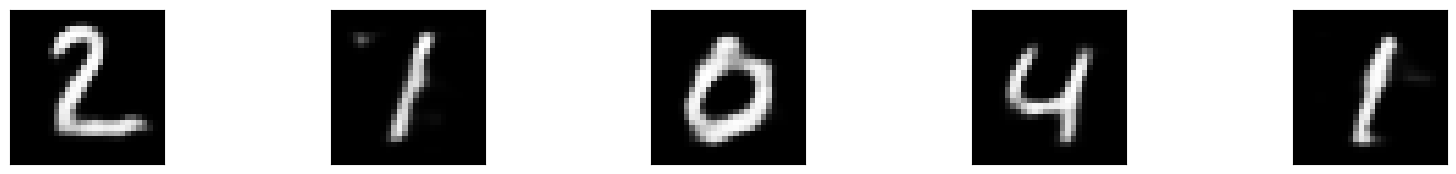

In [ ]:
m = 5
plt.figure(figsize=(20, 2))
for i in range(1, m+1):

# display original
    ax = plt.subplot(1, m, i)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import keras
from keras.datasets import mnist
from keras import layers
import numpy as np